<a href="https://colab.research.google.com/github/rhaymisonbetini/BRAIN_CNN/blob/main/BRAIN_TUMOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thomasdubail/brain-tumors-256x256

 98% 58.0M/59.4M [00:03<00:00, 22.5MB/s]
100% 59.4M/59.4M [00:03<00:00, 15.9MB/s]


In [ ]:
!unzip brain-tumors-256x256.zip

Archive:  brain-tumors-256x256.zip
  inflating: Data/glioma_tumor/G_1.jpg  
  inflating: Data/glioma_tumor/G_10.jpg  
  inflating: Data/glioma_tumor/G_100.jpg  
  inflating: Data/glioma_tumor/G_101.jpg  
  inflating: Data/glioma_tumor/G_102.jpg  
  inflating: Data/glioma_tumor/G_103.jpg  
  inflating: Data/glioma_tumor/G_104.jpg  
  inflating: Data/glioma_tumor/G_105.jpg  
  inflating: Data/glioma_tumor/G_106.jpg  
  inflating: Data/glioma_tumor/G_107.jpg  
  inflating: Data/glioma_tumor/G_108.jpg  
  inflating: Data/glioma_tumor/G_109.jpg  
  inflating: Data/glioma_tumor/G_11.jpg  
  inflating: Data/glioma_tumor/G_110.jpg  
  inflating: Data/glioma_tumor/G_111.jpg  
  inflating: Data/glioma_tumor/G_112.jpg  
  inflating: Data/glioma_tumor/G_113.jpg  
  inflating: Data/glioma_tumor/G_114.jpg  
  inflating: Data/glioma_tumor/G_115.jpg  
  inflating: Data/glioma_tumor/G_116.jpg  
  inflating: Data/glioma_tumor/G_117.jpg  
  inflating: Data/glioma_tumor/G_118.jpg  
  inflating: Data/gliom

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices("GPU")[0], True)
tf.config.run_functions_eagerly(False)


In [ ]:
data_path="/content/Data/"
images = []
labels = []

In [ ]:
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(256, 256))  # Altere o tamanho conforme necessário
            img = img_to_array(img)
            images.append(img)
            labels.append(class_name)

# Convertendo listas para arrays do NumPy
label_encoder = LabelEncoder()
train_labels_np = np.array(labels)
integer_encoded_train_labels = label_encoder.fit_transform(labels)

images_np = np.array(images) / 255
labels_np = np.array(integer_encoded_train_labels)

# Dividir o dataset em treino e teste
train_images, test_images, train_labels, test_labels = train_test_split(
    images_np, labels_np, test_size=0.1, random_state=42
)

# Converter de volta para tensores, se necessário
train_images = tf.convert_to_tensor(train_images)
test_images = tf.convert_to_tensor(test_images)
train_labels = tf.convert_to_tensor(train_labels)
test_labels = tf.convert_to_tensor(test_labels)

In [ ]:
train_images.shape

TensorShape([2786, 256, 256, 3])

In [ ]:
train_labels.shape

TensorShape([2786])

In [ ]:
train_images[0][125]

<tf.Tensor: shape=(256, 3), dtype=float32, numpy=
array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
     

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=[256,256,3]))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="valid"))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=256, activation="relu"))

In [ ]:
model.add(tf.keras.layers.Dense(units=256, activation="relu"))

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_30 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=64,
    validation_data=(test_images, test_labels),
)

Epoch 1/20
44/44 [==============================] - 15s 290ms/step - loss: 1.4284 - sparse_categorical_accuracy: 0.3424 - val_loss: 1.1755 - val_sparse_categorical_accuracy: 0.4645
Epoch 2/20
44/44 [==============================] - 13s 284ms/step - loss: 1.0271 - sparse_categorical_accuracy: 0.5531 - val_loss: 0.8114 - val_sparse_categorical_accuracy: 0.6516
Epoch 3/20
44/44 [==============================] - 12s 281ms/step - loss: 0.7236 - sparse_categorical_accuracy: 0.6985 - val_loss: 0.6852 - val_sparse_categorical_accuracy: 0.7161
Epoch 4/20
44/44 [==============================] - 12s 279ms/step - loss: 0.4851 - sparse_categorical_accuracy: 0.8169 - val_loss: 0.4410 - val_sparse_categorical_accuracy: 0.8290
Epoch 5/20
44/44 [==============================] - 12s 278ms/step - loss: 0.2265 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.7249 - val_sparse_categorical_accuracy: 0.7677
Epoch 6/20
44/44 [==============================] - 12s 279ms/step - loss: 0.1617 - sparse_cate

In [ ]:
label_encoder = LabelEncoder()
test_labels = np.array(test_labels)
integer_encoded_teste_labels = label_encoder.fit_transform(test_labels)

In [ ]:
test_labels = tf.convert_to_tensor(integer_encoded_teste_labels)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10/10 [==============================] - 2s 111ms/step - loss: 0.5579 - sparse_categorical_accuracy: 0.8613


In [ ]:
classes = ["glioma_tumor","meningioma_tumor","normal","pituitary_tumor"]

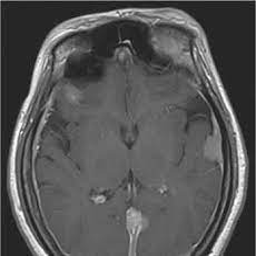

In [ ]:
from PIL import Image
image_path = '/content/meni2.jpeg'
image = Image.open(image_path)
image = image.resize((256, 256))
image

In [ ]:
image_array = np.array(image) / 255.0
image_array

array([[[0.7254902 , 0.7254902 , 0.7254902 ],
        [0.48627451, 0.48627451, 0.48627451],
        [0.49803922, 0.49803922, 0.49803922],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.44313725, 0.44313725, 0.44313725],
        [0.6745098 , 0.6745098 , 0.6745098 ]],

       [[0.40784314, 0.40784314, 0.40784314],
        [0.16470588, 0.16470588, 0.16470588],
        [0.16862745, 0.16862745, 0.16862745],
        ...,
        [0.14117647, 0.14117647, 0.14117647],
        [0.15294118, 0.15294118, 0.15294118],
        [0.41960784, 0.41960784, 0.41960784]],

       [[0.37254902, 0.37254902, 0.37254902],
        [0.12156863, 0.12156863, 0.12156863],
        [0.11764706, 0.11764706, 0.11764706],
        ...,
        [0.12941176, 0.12941176, 0.12941176],
        [0.14117647, 0.14117647, 0.14117647],
        [0.40392157, 0.40392157, 0.40392157]],

       ...,

       [[0.41568627, 0.41568627, 0.41568627],
        [0.15294118, 0.15294118, 0.15294118],
        [0.13333333, 0

In [ ]:
image_array = np.expand_dims(image_array, axis=0)

In [ ]:
image_array

array([[[[0.7254902 , 0.7254902 , 0.7254902 ],
         [0.48627451, 0.48627451, 0.48627451],
         [0.49803922, 0.49803922, 0.49803922],
         ...,
         [0.45882353, 0.45882353, 0.45882353],
         [0.44313725, 0.44313725, 0.44313725],
         [0.6745098 , 0.6745098 , 0.6745098 ]],

        [[0.40784314, 0.40784314, 0.40784314],
         [0.16470588, 0.16470588, 0.16470588],
         [0.16862745, 0.16862745, 0.16862745],
         ...,
         [0.14117647, 0.14117647, 0.14117647],
         [0.15294118, 0.15294118, 0.15294118],
         [0.41960784, 0.41960784, 0.41960784]],

        [[0.37254902, 0.37254902, 0.37254902],
         [0.12156863, 0.12156863, 0.12156863],
         [0.11764706, 0.11764706, 0.11764706],
         ...,
         [0.12941176, 0.12941176, 0.12941176],
         [0.14117647, 0.14117647, 0.14117647],
         [0.40392157, 0.40392157, 0.40392157]],

        ...,

        [[0.41568627, 0.41568627, 0.41568627],
         [0.15294118, 0.15294118, 0.15294118]

In [ ]:
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)
classes[predicted_class[0]]

1/1 [==============================] - 0s 20ms/step


'glioma_tumor'

In [ ]:
model.save(filepath="/content/drive/MyDrive/brain-tumor/")